# Chapter 8 Exercises

1. _What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?_<br>
<br>
You can reduce dimensions to visualize. You can also reduce dimensions to simplify the model needed for the data, or perhaps to speed up training.
However, you may lose prediction power if information is lost<br>
<br>
1. _What is the curse of dimensionality?_<br>
<br>
Higher dimensional spases tend to have sparser datasets, so extrapolations are larger, so models tend to overfit compared to lower dimensality<br><br>
1. _Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?_<br>
<br>
It is only possible if the two features were combined in an independent way, such as all possible combinations of two classes<br><br>
1. _Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?_<br>
<br>
Yes, although it is more likely that information will be lost, as the less linear the dataset, the more information will be lost, as the dataset will not fit as well to the principal components.
<br><br>
1. _Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?_<br>
<br>
It will depend on the dataset, and will be determined during training of the PCA.
<br>
<br><br>
1. _In what cases would you use regular PCA, Incremental PCA, Randomized PCA, or Random Projection?_<br>
<br>
randomized: when the number of features is large enough for training time to be a concern<br>
incremental: when the training set doesn't fit in memory, or you want to do online training<br>
random projection: if you must reduce to a large number of dimensions, on the order of ten thousand<br>
regular: if the cases above do not apply<br>
<br><br>
1. _How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?_<br>
<br>
It depends on your goals for the dimensionality reduction. One set of measures would be to compare the speed and predictive performance of models with and without the dimensionality reduction. Another would be to compare the mean squared distance between instances before reduction and after a reduction and reconstruction, to measure how much information is lost.
<br><br>
1. _Does it make any sense to chain two different dimensionality reduction algorithms?_<br>
<br>
Yes, the dataset may have large scale structure best served by one algorithm, whose output may have structure better served by another algorithm
<br><br>
1. _Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? Try again with an SGDClassifier. How much does PCA help now?_

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

sss = StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=10000)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [3]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfor = RandomForestClassifier(random_state=0)
perf_start = time.perf_counter()
rfor.fit(X_train, y_train)
time0 = time.perf_counter() - perf_start

In [5]:
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

y_test_p0 = rfor.predict(X_test)
print(time0)
print(f1_score(y_test_p0, y_test, average="macro"))

pca = PCA(n_components=0.95)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
#y_test1 = pca.transform(y_test)
#y_train1 = pca.transform(y_train)
rfor1 = RandomForestClassifier(random_state=0)
perf_start = time.perf_counter()
rfor1.fit(X_train1, y_train)
time1 = time.perf_counter() - perf_start

y_test_p1 = rfor1.predict(X_test1)
print(time1)
print(f1_score(y_test_p1, y_test, average="macro"))

34.62271129700002
0.9705481015516673
72.85760467199998
0.9500147524887728


In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def train_predict_sgd(X_train, y_train, X_test, y_test):
    clf = make_pipeline(StandardScaler(),
                        SGDClassifier())#max_iter=1000, tol=1e-3))
    perf_start = time.perf_counter()
    clf.fit(X_train, y_train)
    print(time.perf_counter() - perf_start)
    y_test_p0 = clf.predict(X_test)
    print(f1_score(y_test_p0, y_test, average="macro"))

train_predict_sgd(X_train, y_train, X_test, y_test)

pca = PCA(n_components=0.95)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
train_predict_sgd(X_train1, y_train, X_test1, y_test)    

304.09221396799967
0.8968550252675083
9.3555548610002
0.9077898626627926


10. _Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations._

In [34]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
X = X_train[:5000]
X_tsne = TSNE(n_components=2, learning_rate='auto',init='pca').fit_transform(X)
y = y_train[:5000].astype(int)
X_tsne = np.column_stack((X_tsne, y))
print(X_tsne[0])

/Users/chrismarch/OtherRepos/ml/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[581.62322998 108.07040405   5.        ]


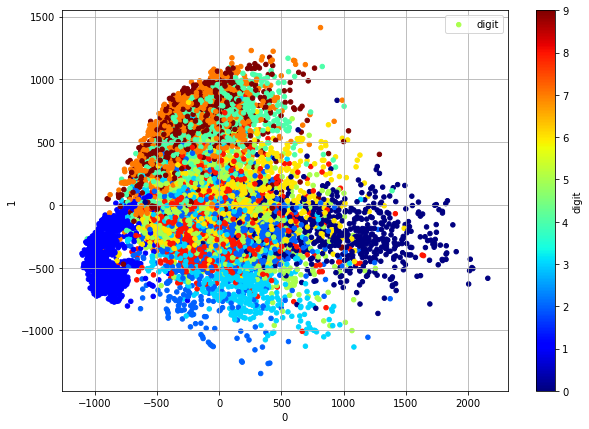

In [38]:
import numpy as np

df_tsne = pd.DataFrame(data=X_tsne,
                        index=range(X_tsne.shape[0]),    # 1st column as index
                        columns=['0', '1', 'digit'])  # 1st row
df_tsne.plot(kind="scatter", x='0', y='1', grid=True,
            c="digit", label="digit",
              cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()